## 一、熵

### 1. $Information$ $Entropy$

$\Rightarrow Definition: 设随机变量X各个取值x_1,x_2,..,x_n的概率依次为p_1,p_2,..,p_n，则其信息熵为:H(P) = -\sum\limits_{i=1}^n p_i\log p_i$

$\Rightarrow Explanation: 随机变量X的信息熵H(P)衡量了其各个取值x_i的不确定度-\log p_i的期望，即X所包含的信息量的平均值$

$\Rightarrow properties:$

$$\begin{equation}\begin{aligned}
& H(P) \ge 0\\
& p_i \in \{0,1\} \rightarrow H(p_i) = 0\\
& p_* = 0.5 = \mathrm{arg}\max\limits_{i} \{H(p_i)\}
\end{aligned}\end{equation}
$$

In [26]:
import numpy as np
def infoEntropy(p):
    H = np.zeros_like(p)
    for i,pi in enumerate(p):
        if pi == 0:
            H[i] = 0.0
        else:
            H[i] = -pi * np.log2(pi)
    return H

p1 = np.array([0.0,0.3,0.5,0.7,1.0]) # prob for example
p2 = np.array([1,1,1,1,1,1]) / 6. # prob for dice
H1 = infoEntropy(p1)
H2 = infoEntropy(p2)
print(H1)
print(np.sum(H2))

[ 0.          0.52108968  0.5         0.36020122 -0.        ]
2.584962500721156


### 2. $Cross$ $Entropy$

$\Rightarrow Definition: 设定义域相同的两个随机变量X,Y的概率分布分别为P,Q，则其交叉熵为:H(P,Q)=-\sum\limits_{i=1}^n p_i\log q_i$

$\Rightarrow Explanation: 交叉熵衡量了分布P,Q之间的绝对距离，一般用于度量模型分布Q与数据分布P之间的差距，常用作损失函数$

$\Rightarrow properties:$

$$\begin{equation}\begin{aligned}
& H(P,Q) \ge H(P)\\
& H(P,Q) = H(P) \iff P = Q
\end{aligned}\end{equation}
$$

In [29]:
import numpy as np
def crossEntropy(p,q):
    Hc = np.zeros_like(p)
    i = 0
    for pi,qi in zip(p,q):
        if pi == 0 and qi == 0:
            Hc[i] = 0.0
        elif qi == 0:
            Hc[i] = -np.inf
        else:
            Hc[i] = -pi * np.log2(qi)
        i += 1
    return Hc

p = np.array([0.1,0.3,0.4,0.2]) # p for real distribution
q = np.array([0.15,0.25,0.45,0.15]) # q for predicted distribution
Hp = infoEntropy(p)
Hc = crossEntropy(p,q)
print("H(p):    {}".format(Hp),"=>",np.sum(Hp)) # Hc(p,q) >= H(p)
print("Hc(p,q): {}".format(Hc),"=>",np.sum(Hc)) # Hc(p,q) = H(p) <=> p = q

H(p):    [0.33219281 0.52108968 0.52877124 0.46438562] => 1.8464393446710154
Hc(p,q): [0.27369656 0.6        0.46080124 0.54739312] => 1.881890915627882


### 3. $Relative $ $Entropy$ / $\mathrm{KL}$ $Divergence$

$\Rightarrow Definition: 设定义域相同的两个随机变量X,Y的概率分布分别为P,Q，则其相对熵/\mathrm{KL}散度为:H(P||Q)=-\sum\limits_{i=1}^n p_i\log \cfrac{q_i}{p_i}$

$\Rightarrow Explanation: 相对熵/\mathrm{KL}散度衡量了分布P,Q之间的相对距离，当P固定时，效果同交叉熵，常用作损失函数$

$\Rightarrow properties:$

$$\begin{equation}\begin{aligned}
& H(P||Q) = -\sum\limits_{i=1}^n p_i\log \cfrac{q_i}{p_i} = -\sum\limits_{i=1}^n (p_i\log q_i - p_i\log{p_i}) = H(P,Q) - H(P)\\
& H(P||Q) \ge 0\\
& H(P||Q) = 0 \iff P = Q\\
\end{aligned}\end{equation}
$$

In [32]:
import numpy as np
def KLDivergence(p,q):
    Hr = np.zeros_like(p)
    i = 0
    for pi,qi in zip(p,q):
        if pi == 0 and qi == 0:
            Hr[i] = 0
        elif qi == 0:
            Hr[i] = -np.inf
        else:
            Hr[i] = -pi*np.log2(qi/pi)
        i += 1
    return Hr
def relativeEntropy(p,q):
    Hr = crossEntropy(p,q) - infoEntropy(p)
    return Hr

p = np.array([0.1,0.3,0.4,0.2]) # p for real distribution
q = np.array([0.15,0.25,0.45,0.15]) # q for predicted distribution
Hp = infoEntropy(p)
Hc = crossEntropy(p,q)
Hr = relativeEntropy(p,q)
KL = KLDivergence(p,q)
print("H(p):       {}".format(Hp),"=>",np.sum(Hp)) # Hc(p,q) >= H(p)
print("Hc(p,q):    {}".format(Hc),"=>",np.sum(Hc)) # Hc(p,q) = H(p) <=> p = q
print("Hr(p,q):    {}".format(Hr),"=>",np.sum(Hr)) # Hr(p,q) = Hc(p,q) - H(p) >= 0
print("KL(p,q):    {}".format(KL),"=>",np.sum(KL)) # KL(p,q) = Hr(p,q), KL(p,q) = 0 <=> p = q

H(p):       [0.33219281 0.52108968 0.52877124 0.46438562] => 1.8464393446710154
Hc(p,q):    [0.27369656 0.6        0.46080124 0.54739312] => 1.881890915627882
Hr(p,q):    [-0.05849625  0.07891032 -0.06797     0.0830075 ] => 0.03545157095686652
KL(p,q):    [-0.05849625  0.07891032 -0.06797     0.0830075 ] => 0.0354515709568664


## 二、EM算法

### 1. $Maximum$ $Likelihood$ $Estimation$

$\Rightarrow Explanation:$

$设待估计参数的概率分布为P(X,\theta),其中\theta为未知参数，X为观测变量，观测样本为\{x_1,x_2,..,x_n\}$

$根据贝叶斯公式：P(\theta | X) = \cfrac{P(X | \theta)P(\theta)}{P(X)}，其中称P(\theta | X)为后验概率,P(X | \theta)为似然概率，P(\theta)为先验概率,P(X)通常认为是常数$

$极大似然估计法的思想是选择\theta使得似然概率极大化：\hat{\theta} = \mathrm{arg}\max\limits_{\theta} P(X|\theta) = \mathrm{arg}\max\limits_{\theta} \prod\limits_{i=1}^n P(x_i|\theta) = \mathrm{arg}\max\limits_{\theta} \sum\limits_{i=1}^n \ln P(x_i|\theta)$

$具体地，设L(\theta;x_1,x_2,..,x_n) = \prod\limits_{i=1}^n P(x_i|\theta),则：\ln L = \sum\limits_{i=1}^n \ln P(x_i|\theta)，若\ln L凹可微，令\cfrac{\partial \ln L}{\partial\theta}|_{\hat\theta}  =0，即得\hat\theta$

### 2. $Expectation$ $Maximization$

$\Rightarrow Explanation:$

$设待估计参数的概率分布为P(X,Z,\theta),其中\theta为未知参数，X为观测变量，Z为隐变量，观测样本为\{x_1,x_2,..,x_n\}$

$由条件链式法则：P(X,Z|\theta) = P(X|\theta)P(Z|X,\theta)，其中称P(X,Z|\theta)为联合似然,P(X|\theta)为观测变量似然，P(Z|X,\theta)为隐变量似然$

$由极大似然估计法的思想，\hat{\theta} = \mathrm{arg}\max\limits_{\theta} P(X|\theta)，但是由于隐变量的存在，P(X|\theta)无法直接解析求解$

$因此，若能找到一个迭代过程：\theta^{(1)},\theta^{(2)},..\theta^{(t)}，使得P(X|\theta^{(t)})不断增大，就能最终收敛于\max\limits_{\theta} P(X|\theta)$

$为了达到上述目的，\mathrm{EM}算法给出了一种极大化联合对数似然\ln P(X,Z|\theta)关于第t轮隐变量似然P(Z|X,\theta^{(t)})的期望的迭代公式：$

$$\begin{equation}\begin{aligned}
\theta^{(t+1)} &= \mathrm{arg}\max\limits_{\theta} E_{P(Z|X,\theta^{(t)})}{[\ln P(X,Z|\theta)]} \\ &= \mathrm{arg}\max\limits_{\theta} \int_{Z}\ln P(X,Z|\theta)P(Z|X,\theta^{(t)})\mathrm{d}Z \end{aligned}\end{equation}
$$

$具体来说，一次迭代可以分为两步：\begin{cases}
E步：计算期望函数：Q(\theta;\theta^{(t)}) = \int_{Z}\ln P(X,Z|\theta)P(Z|X,\theta^{(t)})\mathrm{d}Z\\
M步：求期望函数极大值点：\theta^{(t+1)} = \theta^* = \mathrm{arg}\max\limits_{\theta}Q(\theta;\theta^{(t)})
\end{cases}
$

$\Rightarrow 以下证明EM迭代公式的有效性，即P(X|\theta^{(t+1)})\ge P(X|\theta^{(t)}):$

$由P(X,Z|\theta) = P(X|\theta)P(Z|X,\theta) \Rightarrow \ln P(X,Z|\theta) = \ln P(X|\theta) + \ln P(Z|X,\theta) \Rightarrow \ln P(X|\theta) = \ln P(X,Z|\theta) - \ln P(Z|X,\theta)$

$对等式左边求关于P(Z|X,\theta^{(t)})的期望：E[\ln P(X|\theta)] = \int_{Z}\ln P(X|\theta) P(Z|X,\theta^{(t)})\mathrm{d}Z = \ln P(X|\theta)\cdot\int_{Z} P(Z|X,\theta^{(t)})\mathrm{d}Z = \ln P(X|\theta)$

$再对等式右边求关于P(Z|X,\theta^{(t)})的期望：E[\ln P(X,Z|\theta) - \ln P(Z|X,\theta)] = \int_{Z}\ln P(X,Z|\theta) P(Z|X,\theta^{(t)})\mathrm{d}Z - \int_{Z}\ln P(Z|X,\theta) P(Z|X,\theta^{(t)})\mathrm{d}Z$

$因此：\ln P(X|\theta) = \int_{Z}\ln P(X,Z|\theta) P(Z|X,\theta^{(t)})\mathrm{d}Z - \int_{Z}\ln P(Z|X,\theta) P(Z|X,\theta^{(t)})\mathrm{d}Z = E[\ln P(X,Z|\theta)] - E[\ln P(Z|X,\theta)]$

$要证明P(X|\theta^{(t+1)})\ge P(X|\theta^{(t)})，即证明\ln P(X|\theta^{(t+1)})\ge \ln P(X|\theta^{(t)})，即：$

$$\begin{equation}\begin{aligned}
E[\ln P(X,Z|\theta^{(t+1)})] - E[\ln P(Z|X,\theta^{(t+1)})] &\ge E[\ln P(X,Z|\theta^{(t)})] - E[\ln P(Z|X,\theta^{(t)})]\\
\Rightarrow E[\ln P(X,Z|\theta^{(t+1)})] - E[\ln P(X,Z|\theta^{(t)})] &\ge  E[\ln P(Z|X,\theta^{(t+1)})]   - E[\ln P(Z|X,\theta^{(t)})]\\
\Leftarrow E[\ln P(X,Z|\theta^{(t+1)})] - E[\ln P(X,Z|\theta^{(t)})] &\ge 0 \ge E[\ln P(Z|X,\theta^{(t+1)})]-E[\ln P(Z|X,\theta^{(t)})]\\
\end{aligned}\end{equation}
$$

上式可分解为两个独立的不等式：$\begin{cases}
 E[\ln P(X,Z|\theta^{(t+1)})] \ge E[\ln P(X,Z|\theta^{(t)})] \cdot\cdot\cdot\cdot\cdot\cdot\; (1) \\
 E[\ln P(Z|X,\theta^{(t+1)})] \le E[\ln P(Z|X,\theta^{(t)})] \cdot\cdot\cdot\cdot\cdot\cdot\; (2)
\end{cases}$

$对于(1)，由迭代公式：\theta^{(t+1)} = \mathrm{arg}\max\limits_{\theta} E{[\ln P(X,Z|\theta)]} \Rightarrow \forall \theta,E[\ln P(X,Z|\theta^{(t+1)})] \ge E[\ln P(X,Z|\theta)]，令\theta = \theta^{(t)}即得证$

$对于(2)，展开可得：\int_{Z}\ln P(Z|X,\theta^{(t+1)}) P(Z|X,\theta^{(t)})\mathrm{d}Z \le \int_{Z}\ln P(Z|X,\theta^{(t)}) P(Z|X,\theta^{(t)})\mathrm{d}Z$

$令P = P(Z|X,\theta^{(t)}),Q = P(Z|X,\theta^{(t+1)})，对等式两端同时取负，可得：\int_{Z}-P\ln Q \mathrm{d}Z \ge \int_{Z}-P\ln P\mathrm{d}Z \Rightarrow H(P,Q)\ge H(P)$

$因此，(2)等价于证明P与Q的交叉熵不小于P的信息熵，由交叉熵的性质易知正确$

$由(1),(2)的正确性，即得P(X|\theta^{(t+1)})\ge P(X|\theta^{(t)})，故\mathrm{EM}算法的迭代公式有效$

 $\Rightarrow 进一步地，以下说明\mathrm{EM}算法迭代公式的原理：$

$由极大似然估计：\hat{\theta} = \mathrm{arg}\max\limits_{\theta} P(X|\theta) = \mathrm{arg}\max\limits_{\theta} \ln P(X|\theta) = \mathrm{arg}\max\limits_{\theta} \ln \cfrac{P(X,Z|\theta)}{P(Z|X,\theta)} = \mathrm{arg}\max\limits_{\theta} [\ln P(X,Z|\theta) - \ln{P(Z|X,\theta)}]$

$引入关于隐变量的辅助分布Q(Z)，上式可进一步变形为：\hat{\theta} = \mathrm{arg}\max\limits_{\theta} [\ln \cfrac{P(X,Z|\theta)}{Q(Z)} - \ln \cfrac{P(Z|X,\theta)}{Q(Z)}]$

$对等式左边求关于Q(Z)的期望：\int_Z\hat{\theta}\cdot Q(Z)\mathrm{d}Z = \hat{\theta}\cdot \int_Z Q(Z)\mathrm{d}Z = \hat\theta$

$再对等式右边求关于Q(Z)的期望：\mathrm{arg}\max\limits_{\theta} [\int_Z Q(Z)\ln \cfrac{P(X,Z|\theta)}{Q(Z)}\mathrm{d}Z + \int_Z-Q(Z)\ln \cfrac{P(Z|X,\theta)}{Q(Z)}\mathrm{d}Z]$

$令\mathrm{ELBO} = \int_ZQ(Z)\ln \cfrac{P(X,Z|\theta)}{Q(Z)}\mathrm{d}Z,则有：\hat\theta = \mathrm{arg}\max\limits_{\theta} [\mathrm{ELBO} + \mathrm{KL}(Q(Z)\| P(Z|X,\theta))]$

$由\mathrm{KL}散度的性质：\mathrm{KL}(Q(Z)\| P(Z|X,\theta)) \ge 0, 当且仅当Q(Z) = P(Z|X,\theta)时取等号$

$故第t轮迭代后，若令Q(Z) = P(Z|X,\theta^{(t)})，则：\mathrm{ELBO} + \mathrm{KL}(Q(Z)\| P(Z|X,\theta)) =\mathrm{ELBO} \Rightarrow \theta^{(t+1)} = \mathrm{arg}\max\limits_{\theta} \mathrm{ELBO}，即：$

$$\begin{equation}\begin{aligned}
\theta^{(t+1)} &= \mathrm{arg}\max\limits_{\theta} \int_ZQ(Z)\ln \cfrac{P(X,Z|\theta)}{Q(Z)}\mathrm{d}Z \\ 
&= \mathrm{arg}\max\limits_{\theta} [\int_ZQ(Z)\ln P(X,Z|\theta)\mathrm{d}Z - \int_ZQ(Z)\ln{Q(Z)}\mathrm{d}Z] \\
&= \mathrm{arg}\max\limits_{\theta} \int_ZQ(Z)\ln P(X,Z|\theta)\mathrm{d}Z \\
&= \mathrm{arg}\max\limits_{\theta} \int_ZP(Z|X,\theta^{(t)})\ln P(X,Z|\theta)\mathrm{d}Z\\
&= \mathrm{arg}\max\limits_{\theta} E_{P(Z|X,\theta^{(t)})}{[\ln P(X,Z|\theta)]}
\end{aligned}\end{equation}
$$

$\Rightarrow 综上所述：\mathrm{EM}算法本质上是引入隐变量的辅助分布并求其期望，再利用\mathrm{KL}散度的性质，将极大化似然的目标等价为极大化\mathrm{ELBO}，即证据下界$

$而所谓证据下界的本质是：观测变量与隐变量的联合对数似然关于隐变量似然的期望：E_{P(Z|X,\theta^{(t)})}{[\ln P(X,Z|\theta)]}$

## 三、高斯混合模型

### 1. $Gaussian$ $Mixture$ $Model$

$\Rightarrow Description: 由K个高斯分布加权混合而成的分布$

$\Rightarrow\mathrm{PDF}: p(X = x) = \sum\limits_{k=1}^K \alpha_kN(\vec\mu_k,\Sigma_k)，其中\sum\limits_{k=1}^K \alpha_k = 1$

$\Rightarrow 随机变量有两部分：\begin{cases}观测变量为X，观测样本为x_1,x_2,..,x_n，其中x_i是在任意一个高斯分布N(\mu_j,\Sigma_j)中取样；\\
隐变量为Z，隐藏样本为z_1,z_2,..,z_n，其中z_i = j\in\{1,2,..,K\}表示x_i选择第j个高斯分布N(\mu_j,\Sigma_j)，然后从中取样；
\end{cases}$

$\Rightarrow 待估计参数有三组：\begin{cases}
高斯分布的选择概率，即权重\alpha_1,\alpha_2,..,\alpha_K\\
每个高斯分布的均值向量\vec\mu_1,\vec\mu_2,..,\vec\mu_K\\
每个高斯分布的协方差矩阵\Sigma_1,\Sigma_2,..,\Sigma_K
\end{cases}$

### 2. $\mathrm{EM}$ $for$ $\mathrm{GMM}$

$\Rightarrow E步：$

$$\begin{equation}\begin{aligned}
Q(\theta;\theta^{(t)}) &= \int_Z \ln P(X,Z|\theta) P(Z|X,\theta^{(t)}) dZ \\
&= \sum\limits_{z} [ \ln \prod\limits_{i=1}^n P(x_i,z_i|\theta)\cdot \prod\limits_{j=1}^n P(z_j|x_j,\theta^{(t)})]\\
&= \sum\limits_{z_1\sim z_n} [\sum\limits_{i=1}^n \ln P(x_i,z_i|\theta)\cdot \prod\limits_{j=1}^n P(z_j|x_j,\theta^{(t)})]，其中最外层求和表示：对于每个样本z_i,遍历所有可能的取值\{1,2,..,K\}\\ 
&= \sum\limits_{i=1}^n\sum\limits_{z_1\sim z_n} [\ln P(x_i,z_i|\theta)\cdot \prod\limits_{j=1}^n P(z_j|x_j,\theta^{(t)})]\\
&= \sum\limits_{i=1}^n \sum\limits_{z_1\sim z_n}[\ln P(x_i,z_i|\theta)P(z_i|x_i,\theta^{(t)})\cdot \prod\limits_{j=1\sim n,j\neq i} P(z_j|x_j,\theta^{(t)})]\\
&= \sum\limits_{i=1}^n [\sum\limits_{z_i}\ln P(x_i,z_i|\theta)P(z_i|x_i,\theta^{(t)})\cdot \sum\limits_{z_1\sim z_{i-1},z_{i+1}\sim z_n}\prod\limits_{j=1\sim n,j\neq i} P(z_j|x_j,\theta^{(t)})]\\
&= \sum\limits_{i=1}^n \sum\limits_{z_i}\ln P(x_i,z_i|\theta)P(z_i|x_i,\theta^{(t)})，其中\forall i,z_i = 1 \rightarrow K
\end{aligned}\end{equation}
$$

$其中倒数第二步到最后一步的推导：\sum\limits_{z_1\sim z_{i-1},z_{i+1}\sim z_n}\prod\limits_{j=1\sim n,j\neq i} P(z_j|x_j,\theta^{(t)}) = \sum\limits_{z_1}P(z_1|x_1,\theta^{(t)})[\sum\limits_{z_2}P(z_2|x_2,\theta^{(t)})[..]] = 1\times[1\times[..]] = 1$

$又\begin{cases}
由条件链式法则：P(x_i,z_i|\theta) = P(z_i|\theta)P(x_i|z_i,\theta) = \alpha_{z_i}N(x_i|\vec\mu_{z_i},\Sigma_{z_i}), \\
由贝叶斯定理：P(z_i|x_i,\theta^{(t)}) = \cfrac{P(x_i,z_i|\theta^{(t)})}{P(x_i|\theta^{(t)})} = \cfrac{\alpha_{z_i}^{(t)}N(x_i|\vec\mu_{z_i}^{(t)},\Sigma_{z_i}^{(t)})}{\sum\limits_{k=1}^K \alpha_k^{(t)}N(\vec\mu_k^{(t)},\Sigma_k^{(t)})} = C_{x_i,z_i}^{(t)}
\end{cases}$

$因此Q(\theta;\theta^{(t)})的最终可化简如下：$

$$\begin{equation}\begin{aligned}
Q(\theta;\theta^{(t)}) 
&= \sum\limits_{i=1}^n \sum\limits_{z_i}\ln \alpha_{z_i}N(x_i|\vec\mu_{z_i},\Sigma_{z_i})\cdot C_{x_i,z_i}^{(t)}\\
&= \sum\limits_{i=1}^n \sum\limits_{j=1}^K\ln \alpha_{j}N(x_i|\vec\mu_{j},\Sigma_{j})\cdot C_{x_i,j}^{(t)}\\
&= \sum\limits_{j=1}^K\sum\limits_{i=1}^n C_{x_i,j}^{(t)}\cdot[\ln \alpha_{j}+\ln N(x_i|\vec\mu_{j},\Sigma_{j})]\\
&= \sum\limits_{j=1}^K\sum\limits_{i=1}^n C_{x_i,j}^{(t)}\cdot[\ln \alpha_{j}+\ln \cfrac{1}{(2\pi)^{p/2}|\Sigma_j|^{1/2}} -\frac{1}{2}(\vec x_i-\vec\mu_j)^T\Sigma_j^{-1}(\vec x_i-\vec\mu_j)]\\
&= \sum\limits_{j=1}^K\sum\limits_{i=1}^n C_{x_i,j}^{(t)}\cdot[\ln \alpha_{j}-\frac{p}{2}\ln{(2\pi)}-\frac{1}{2}\ln{|\Sigma_j|} -\frac{1}{2}(\vec x_i-\vec\mu_j)^T\Sigma_j^{-1}(\vec x_i-\vec\mu_j)]\\
\end{aligned}\end{equation}
$$

$\Rightarrow M步：$

$$\begin{equation}\begin{aligned}
\theta^{(t+1)} &= \theta^* = \mathrm{arg}\max\limits_{\theta} Q(\theta;\theta^{(t)})\\
&= \mathrm{arg}\max\limits_{\theta} \sum\limits_{j=1}^K\sum\limits_{i=1}^n C_{x_i,j}^{(t)}\cdot[\ln \alpha_{j}-\frac{1}{2}\ln{|\Sigma_j|} -\frac{1}{2}(\vec x_i-\vec\mu_j)^T\Sigma_j^{-1}(\vec x_i-\vec\mu_j)]\\
\end{aligned}\end{equation}
$$

$对三组待估计参数分别求极大值点：$

$$\begin{equation}\begin{cases}
\alpha_{k}^{(t+1)} = \mathrm{arg}\max\limits_{\alpha_{k}} \sum\limits_{j=1}^K\sum\limits_{i=1}^n C_{x_i,j}^{(t)}\cdot\ln \alpha_{j}, \;s.t.\sum\limits_{j=1}^K \alpha_{j}=1, &\forall k \in \{1,2,..,K\}\\
\mu_{k}^{(t+1)} = \mathrm{arg}\max\limits_{\mu_{k}} \sum\limits_{j=1}^K\sum\limits_{i=1}^n -\frac{C_{x_i,j}^{(t)}}{2}(\vec x_i-\vec\mu_j)^T\Sigma_j^{-1}(\vec x_i-\vec\mu_j),&\forall k \in \{1,2,..,K\}\\
\Sigma_{k}^{(t+1)} = \mathrm{arg}\max\limits_{\Sigma_{k}} \sum\limits_{j=1}^K\sum\limits_{i=1}^n -\frac{C_{x_i,j}^{(t)}}{2}[\ln{|\Sigma_j|}+(\vec x_i-\vec\mu_j)^T\Sigma_j^{-1}(\vec x_i-\vec\mu_j)],&\forall k \in \{1,2,..,K\}
\end{cases}\end{equation}
$$

$最终可得三组待估计参数的迭代公式：$

$$\begin{equation}\begin{cases}
\alpha_{k}^{(t+1)} = \cfrac{\sum\limits_{i=1}^n C_{x_i,k}^{(t)}}{n}, &\forall k \in \{1,2,..,K\}\\
\mu_{k}^{(t+1)} = \cfrac{\sum\limits_{i=1}^n C_{x_i,k}^{(t)}x_i}{\sum\limits_{i=1}^n C_{x_i,k}^{(t)}},&\forall k \in \{1,2,..,K\}\\
\Sigma_{k}^{(t+1)} = \cfrac{\sum\limits_{i=1}^n C_{x_i,k}^{(t)}(x_i-\mu_k^{(t)})(x_i-\mu_k^{(t)})^T}{\sum\limits_{i=1}^n C_{x_i,k}^{(t)}} ,&\forall k \in \{1,2,..,K\}
\end{cases}\end{equation}
$$

(-7.382704638521613,
 12.941513607114262,
 -11.16227612458543,
 11.844287225408893)

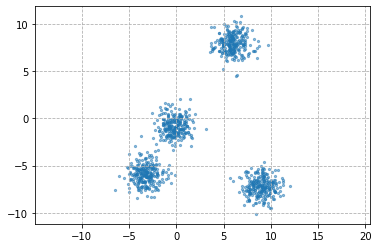

In [71]:
## GMM sampling and EM solving
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets._samples_generator import make_blobs

# generate data and show the true distribution
n = 1000
K = 4
X,y_true = make_blobs(n_samples=n,centers=K)
fig,ax = plt.subplots(1,1,sharey='row')
ax.scatter(X[:,0],X[:,1],s=5,alpha=0.5)
ax.grid(ls='--')
plt.axis('equal')

In [72]:
# GMM
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

In [73]:
# show the theta
print("alpha:")
for k in range(K):
    print('alpha',k+1,':',gmm.weights_[k])
print("==========================")
print("mean:")
for k in range(K):
    print('mean',k+1,':',gmm.means_[k])
print("==========================")
print("covariance:")
for k in range(K):
    print('conv',k+1,':',gmm.covariances_[k])
print("==========================")

alpha:
alpha 1 : 0.24900502159340307
alpha 2 : 0.2500000000004568
alpha 3 : 0.2500000000000003
alpha 4 : 0.2509949784061398
mean:
mean 1 : [-0.2343107  -0.81717985]
mean 2 : [5.93799004 7.932809  ]
mean 3 : [ 8.93245369 -7.19676559]
mean 4 : [-3.27519924 -5.92337824]
covariance:
conv 1 : [[0.90398539 0.03980379]
 [0.03980379 0.95017554]]
conv 2 : [[1.03089867 0.03370964]
 [0.03370964 0.96127245]]
conv 3 : [[1.11283483 0.00535484]
 [0.00535484 0.9154477 ]]
conv 4 : [[1.00470673 0.01692275]
 [0.01692275 1.00302633]]


In [74]:
# show the prediction
print(gmm.predict_proba(X)[:10])
print(np.argmax(gmm.predict_proba(X)[:10],axis=1)+1)

[[1.77635535e-06 5.05838386e-54 1.93090447e-18 9.99998224e-01]
 [9.99999983e-01 9.47828239e-25 2.74446254e-23 1.73357821e-08]
 [6.56171219e-24 1.00000000e+00 1.15654959e-57 2.34574859e-56]
 [9.99999942e-01 9.39416924e-26 6.65690339e-24 5.81494353e-08]
 [3.30005885e-26 1.08848871e-50 1.00000000e+00 1.15655717e-28]
 [9.99999860e-01 2.57982683e-26 8.58574716e-22 1.39930987e-07]
 [7.46856072e-31 1.00000000e+00 1.40805348e-53 7.68870809e-66]
 [9.99999877e-01 1.82536188e-26 2.85190448e-26 1.22538429e-07]
 [3.35587804e-25 1.00000000e+00 8.05785547e-62 2.09280480e-58]
 [1.66113556e-06 1.87042564e-54 2.25304337e-24 9.99998339e-01]]
[4 1 2 1 3 1 2 1 2 4]


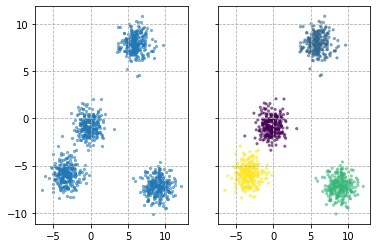

In [75]:
# show the predicted labels
labels = gmm.predict(X)
fig,ax = plt.subplots(1,2,sharey='row')
ax[0].scatter(X[:,0],X[:,1],s=5,alpha=0.5)
ax[0].grid(ls='--')
ax[1].scatter(X[:,0],X[:,1],s=5,alpha=0.5,c=labels,cmap='viridis')
ax[1].grid(ls='--')